In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sube = pd.read_csv(r"C:\Users\Nicolas\Downloads\Movie dataset\dat-ab-usos-2022.csv")
sube.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO


In [3]:
sube.CANTIDAD = pd.to_numeric(sube.CANTIDAD)

In [4]:
sg = sube[sube['TIPO_TRANSPORTE']=='COLECTIVO'].copy()

In [5]:
sg['DIA_TRANSPORTE'] = pd.to_datetime(sg['DIA_TRANSPORTE'])
sg['Dia de la semana'] = sg['DIA_TRANSPORTE'].dt.day_name()

In [6]:
sg = sg[sg['PROVINCIA']!='JN']

In [7]:
Dias={'Sunday':'Domingo','Monday':'Lunes','Tuesday':'Martes','Thursday':'Jueves','Wednesday':'Miercoles','Saturday':'Sabado','Friday':'Viernes'}
sg['Dia de la semana'] = sg['Dia de la semana'].map(lambda x:Dias[x])
sg['Dia de la semana'].unique()

array(['Sabado', 'Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves',
       'Viernes'], dtype=object)

In [8]:
sg = sg.groupby(['PROVINCIA','Dia de la semana']).agg({'CANTIDAD':'sum','LINEA':'nunique'})

In [9]:
sg['CANTIDAD'] = sg['CANTIDAD']/sg['LINEA']

In [10]:
sg = sg.drop('LINEA',axis=1)

In [11]:
sg = sg.unstack()
sg.columns = sg.columns.droplevel()

In [12]:
sg = sg[['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']]

Text(0.5, 87.0, 'Dia de la semana')

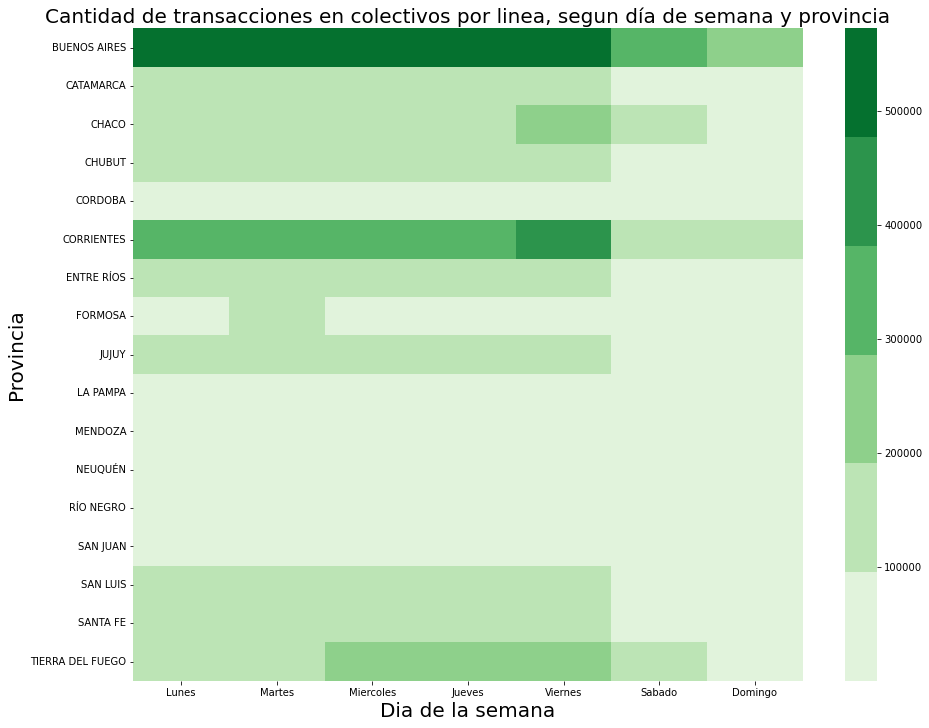

In [13]:
from matplotlib import pyplot as plt
colormap = sns.color_palette("Greens")
plt.figure(figsize=(15,12))
ax = sns.heatmap(sg,cmap=colormap)
plt.title('Cantidad de transacciones en colectivos por linea, segun día de semana y provincia',fontsize=20)
ax.set_ylabel("Provincia",fontsize=20)
ax.set_xlabel("Dia de la semana",fontsize=20)

In [14]:
sube=sube[((sube['TIPO_TRANSPORTE']=='COLECTIVO') | (sube['TIPO_TRANSPORTE']=='SUBTE')) & (sube['AMBA']=='SI')]

In [15]:
sube['DIA_TRANSPORTE'] = pd.to_datetime(sube['DIA_TRANSPORTE'])
sube['Dia de la semana'] = sube['DIA_TRANSPORTE'].dt.day_name()

In [16]:
Dias={'Sunday':'Domingo','Monday':'Lunes','Tuesday':'Martes','Thursday':'Jueves','Wednesday':'Miercoles','Saturday':'Sabado','Friday':'Viernes'}
sube['Dia de la semana'] = sube['Dia de la semana'].map(lambda x:Dias[x])

In [20]:
sube = sube.groupby(['Dia de la semana','TIPO_TRANSPORTE']).agg('sum').reset_index()

In [25]:
sube

,Dia de la semana,TIPO_TRANSPORTE,CANTIDAD
0,Domingo,COLECTIVO,119856107
1,Domingo,SUBTE,8034370
2,Jueves,COLECTIVO,322905563
3,Jueves,SUBTE,28813606
4,Lunes,COLECTIVO,306541079
5,Lunes,SUBTE,25004956
6,Martes,COLECTIVO,326788506
7,Martes,SUBTE,28055767
8,Miercoles,COLECTIVO,316317372
9,Miercoles,SUBTE,27316997


Text(0.5, 0, 'Dia de la semana')

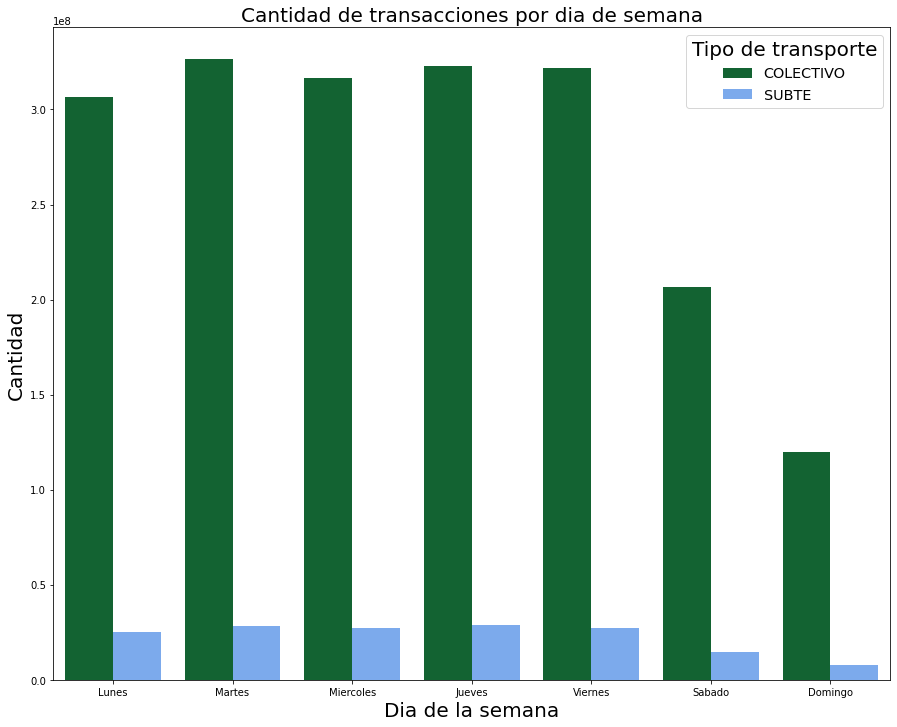

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,12))
ax = sns.barplot(x=sube['Dia de la semana'],y=sube['CANTIDAD'],hue=sube['TIPO_TRANSPORTE'],palette={'COLECTIVO':'#05712F','SUBTE':'#69A7FF'},
            order=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
plt.title('Cantidad de transacciones por dia de semana',fontsize=20)
plt.legend(title='Tipo de transporte',fontsize='x-large', title_fontsize='20',loc='upper right')
ax.set_ylabel("Cantidad",fontsize=20)
ax.set_xlabel("Dia de la semana",fontsize=20)